# Introduction to Artificial Intelligence: HS 2023


---

## Lecture 9: Unsupervised Learning (Dimensionality Reduction)

In this demo, we will learn how to apply dimensionality reduction using Principal Component Analysis.


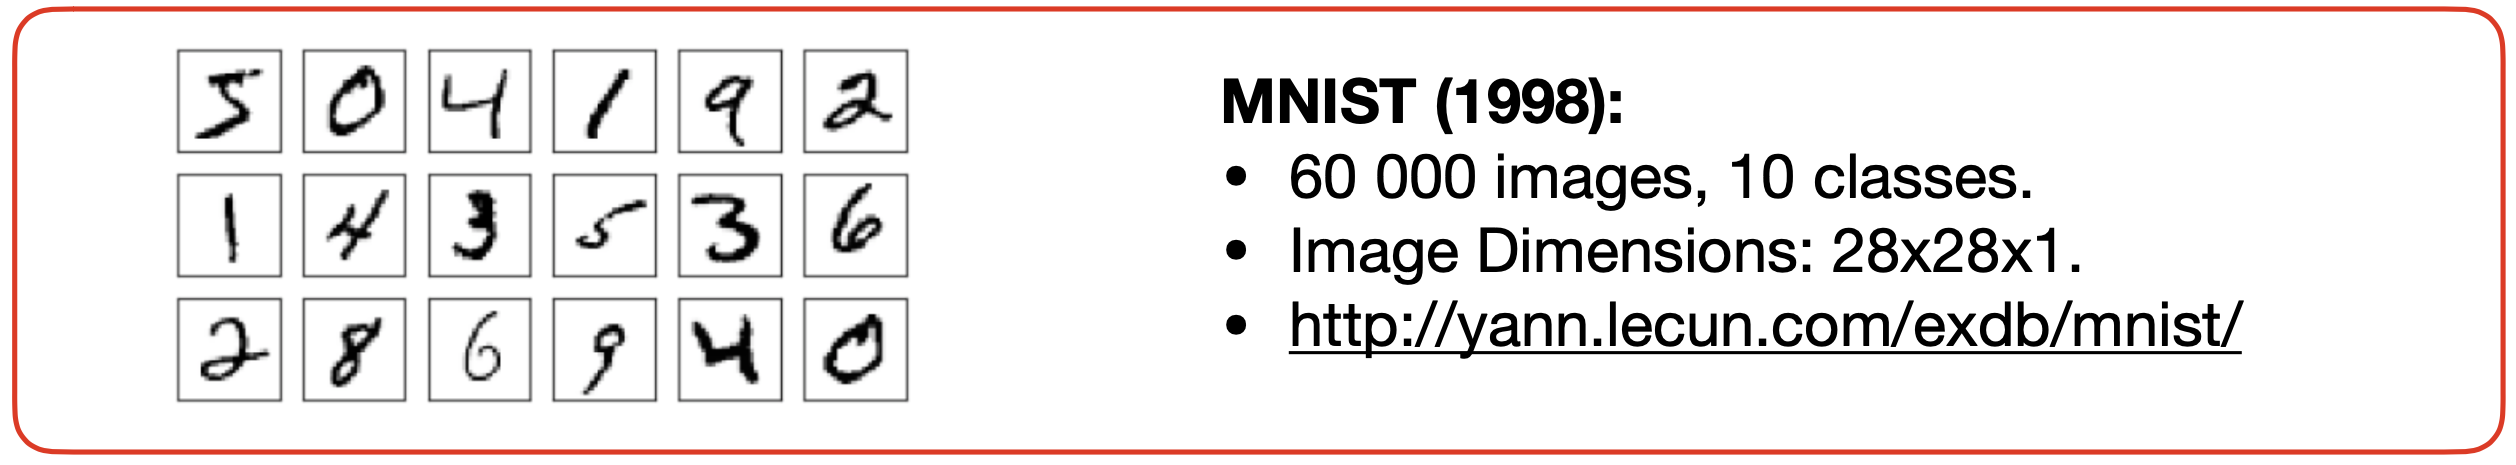
<center> Figure. MNIST Handwritten digits dataset </center>

# 1. Import Libraries

In [ ]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.sparse.linalg import eigs
from sklearn.decomposition import PCA
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

# 2. Load Dataset

In [ ]:
digits = load_digits()
digits.data.shape

(1797, 64)

In [ ]:
# Put the image data onto an X variable
# Put the image targets onto an Y variable
X = digits.data
Y = digits.target

In [ ]:
print(X.shape)

(1797, 64)


In [ ]:
print(Y.shape)

(1797,)


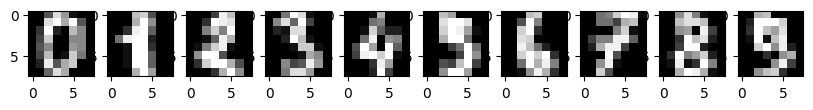

In [ ]:
fig, ax = plt.subplots(ncols=10, figsize=(10, 5))
for i in range(10):
    some_digit = digits.images[i]
    ax[i].imshow(some_digit, cmap='gray')

##### __Task (a): Answer by Hand: Choose a suitable number of components based on the plot below__

In [ ]:
pca = PCA()
pca.fit(X)

PCA()

In [ ]:
pca.explained_variance_ratio_

array([1.48905936e-01, 1.36187712e-01, 1.17945938e-01, 8.40997942e-02,
       5.78241466e-02, 4.91691032e-02, 4.31598701e-02, 3.66137258e-02,
       3.35324810e-02, 3.07880621e-02, 2.37234084e-02, 2.27269657e-02,
       1.82186331e-02, 1.77385494e-02, 1.46710109e-02, 1.40971560e-02,
       1.31858920e-02, 1.24813782e-02, 1.01771796e-02, 9.05617439e-03,
       8.89538461e-03, 7.97123157e-03, 7.67493255e-03, 7.22903569e-03,
       6.95888851e-03, 5.96081458e-03, 5.75614688e-03, 5.15157582e-03,
       4.89539777e-03, 4.28887968e-03, 3.73606048e-03, 3.53274223e-03,
       3.36683986e-03, 3.28029851e-03, 3.08320884e-03, 2.93778629e-03,
       2.56588609e-03, 2.27742397e-03, 2.22277922e-03, 2.11430393e-03,
       1.89909062e-03, 1.58652907e-03, 1.51159934e-03, 1.40578764e-03,
       1.16622290e-03, 1.07492521e-03, 9.64053065e-04, 7.74630271e-04,
       5.57211553e-04, 4.04330693e-04, 2.09916327e-04, 8.24797098e-05,
       5.25149980e-05, 5.05243719e-05, 3.29961363e-05, 1.24365445e-05,
      

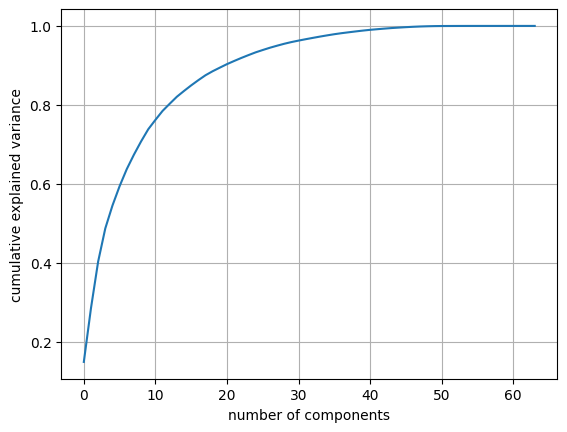

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()

**Your Answer**: ...

# 3. Computing PCA

##### __Task (b): Plot the digits__

We will try to make a scatter-plot of the digits in a 2D space. Therefore, we have to reduce the dimensionality to `n_components=2`.
- **Answer by Hand:** Do you think 2 components is enough for a classifier to distinguish the digits? Based on the plot above: How big is the cumulative explained variance?

Do the following:
1. Reduce the dimensionality of the data to 2D using PCA
2. plot the result using a scatter plot
   - Color the points based on their class (`digits.target`)



In [ ]:
# 1. Compute the Dataset Mean and center your data accordingly. Hint: have a look a the np.mean() function.
...
print('Mean vector shape: {}'.format(mu.shape))

Mean vector shape: (64,)


In [ ]:
# 2. Compute the Covariance Matrix. Hint: have a look a the np.cov() function.
...
print('Covariance Matrix shape: {}'.format(sigma.shape))

Covariance Matrix shape: (64, 64)


In [ ]:
# 3. Compute the Eigenvectors and Eigenvalues of your Covariance Matrix and select the top K=2 Principal Components. Hint: have a look at the eigs() function.
K = 2
...
print('Eigenvalues\' shape: {}'.format(E.shape))
print('Eigenvectors\' shape: {}'.format(W.shape))

Eigenvalues' shape: (2,)
Eigenvectors' shape: (64, 2)


In [ ]:
# 4. Project your dataset using
...
print('Projected data shape: {}'.format(Z.shape))

(1797, 2)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


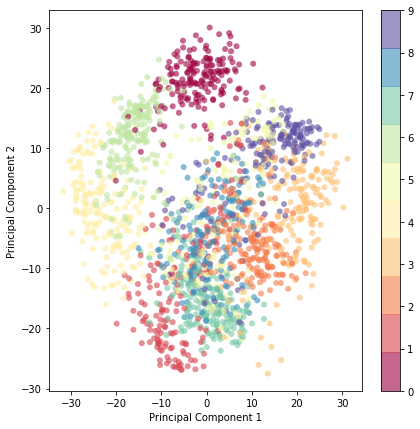

In [ ]:
# 5. Display your proyected data on 2D.
plt.figure(figsize=(7, 7))
plt.scatter(Z[:, 0], Z[:, 1],
            c=digits.target, edgecolor='none', alpha=0.6,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()

In [ ]:
# Use PCA's method to .fit() and .transform() your data using K=2 Principal Components
...
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


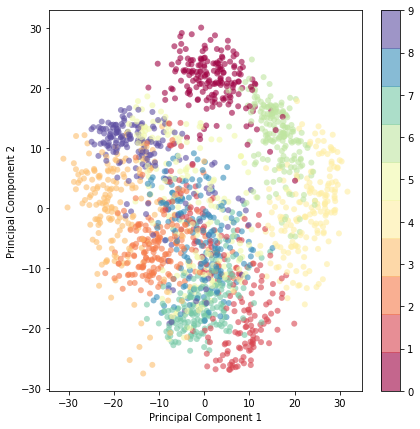

In [ ]:
plt.figure(figsize=(7, 7))
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.6,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()